# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: Correlation between Posture & Personality Trait (kaggle.com)


Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [4]:
#importing libraries and aliases for eda and visuals
import pandas as pd
import numpy as np
#visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# read in dataset and creating dataframe
df = pd.read_csv('Myers Briggs Table_S1 (1).csv')


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [6]:
# observing the top 5 rows and all columns
df.head()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [7]:
# observing the last 5 rows
df.tail()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
92,93,16,58,100,Male,Moderate,0.0,0.0,0.0,3.0,ESTP,19,2,22,4,19,5,2,20,B
93,94,45,62,134,Female,Moderate,0.0,4.0,0.0,0.0,ESFJ,11,10,17,9,6,18,13,9,B
94,95,43,69,188,Male,Moderate,2.0,0.0,0.0,0.0,ENFP,12,9,9,17,6,18,2,20,A
95,96,28,67,180,Female,Low,0.0,0.0,0.0,0.0,ESFJ,11,10,22,14,8,16,14,8,B
96,97,43,69,188,Male,Moderate,4.0,0.0,0.0,0.0,ENFP,12,9,9,17,6,18,2,20,A


In [228]:
#checking the data types
df.dtypes

S No                int64
AGE                 int64
HEIGHT              int64
WEIGHT              int64
SEX                object
ACTIVITY LEVEL     object
PAIN 1            float64
PAIN 2            float64
PAIN 3            float64
PAIN 4            float64
MBTI               object
E                   int64
I                   int64
S                   int64
N                   int64
T                   int64
F                   int64
J                   int64
P                   int64
POSTURE            object
dtype: object

In [232]:
# checking the full shape of the dataset
df.shape

(97, 20)

In [231]:
# returning a random sample to observe now that I know the data types and look at the column names
df.sample(10)

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
30,31,46,66,222,Male,Low,0.0,0.0,0.0,8.0,ESFP,18,3,14,12,12,12,2,20,A
48,49,20,68,155,Male,Low,1.0,4.0,1.0,2.0,ESTP,16,5,17,9,15,9,10,12,B
15,16,62,71,165,Male,Low,0.0,1.0,0.0,0.0,ISTJ,2,19,14,12,22,2,19,3,D
53,54,19,68,113,Female,Low,0.0,4.0,6.0,2.0,INFJ,7,14,18,8,12,12,14,8,D
64,65,42,70,170,Male,Low,0.0,4.0,0.0,0.0,ESFP,18,3,17,9,5,19,6,16,A
65,66,18,62,110,Female,Low,4.0,5.0,0.0,0.0,ISTJ,4,17,22,4,13,11,20,2,B
90,91,29,65,125,Female,Moderate,2.0,0.0,0.0,4.0,ENFP,19,2,13,13,12,12,10,12,A
52,53,50,65,172,Female,Low,0.0,0.0,0.0,3.0,ESFP,14,7,19,7,1,23,5,17,A
71,72,45,67,148,Male,Low,2.0,3.0,0.0,5.0,ISFJ,5,16,18,8,12,12,17,5,C
5,6,68,74,182,Male,Low,0.0,2.5,1.5,0.0,ISFP,4,17,17,9,11,13,4,18,D


In [20]:
# quick overview of the dataset for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S No            97 non-null     int64  
 1   AGE             97 non-null     int64  
 2   HEIGHT          97 non-null     int64  
 3   WEIGHT          97 non-null     int64  
 4   SEX             97 non-null     object 
 5   ACTIVITY LEVEL  97 non-null     object 
 6   PAIN 1          97 non-null     float64
 7   PAIN 2          97 non-null     float64
 8   PAIN 3          97 non-null     float64
 9   PAIN 4          97 non-null     float64
 10  MBTI            97 non-null     object 
 11  E               97 non-null     int64  
 12  I               97 non-null     int64  
 13  S               97 non-null     int64  
 14  N               97 non-null     int64  
 15  T               97 non-null     int64  
 16  F               97 non-null     int64  
 17  J               97 non-null     int64

In [233]:
# observing #of unique elements in each column
df.nunique()

S No              97
AGE               53
HEIGHT            17
WEIGHT            55
SEX                2
ACTIVITY LEVEL     3
PAIN 1            15
PAIN 2            17
PAIN 3            15
PAIN 4            17
MBTI              15
E                 20
I                 20
S                 20
N                 20
T                 23
F                 23
J                 21
P                 21
POSTURE            4
dtype: int64

In [69]:
# Columns Legend
# AGE - Age of the candidate
# HEIGHT - Height of the candidate
# WEIGHT - Weight of the candidate
# SEX - Gender of the candidate
# ACTIVITY LEVEL - Daily activity of the candidate
# PAIN 1, PAIN 2, PAIN 3, PAIN 4 - Pain experienced at different places on a scale of 10
# MBTI - Myers Briggs Personality type
# E - Extrovertism
# I - Introvertism
# S - Sensing
# N - Intuition
# T - Thinking
# F - Feeling
# J - Judging
# P - Perceiving
# POSTURE - ideal posture (A), kyphosis-lordosis (B), flat back (C), sway-back (D

In [261]:
#renaming column names for better understanding
df = df.rename(columns={"PAIN 1":"Neck Pain", "PAIN 2":"Upper Back Pain","PAIN 3":"Lower Back Pain","PAIN 4":"Spine Base Pain","E":"Extrovert","Intuition":"Introvert","S":"Sensing","Introvert":"Intuition","T":"Thinking","F":"Feeling","J":"Judging","P":"Perceiving"})
df

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,Neck Pain,Upper Back Pain,Lower Back Pain,Spine Base Pain,MBTI,Extrovert,Intorvert,Sensing,Intuition,Thinking,Feeling,Judging,Perceiving,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,16,58,100,Male,Moderate,0.0,0.0,0.0,3.0,ESTP,19,2,22,4,19,5,2,20,B
93,94,45,62,134,Female,Moderate,0.0,4.0,0.0,0.0,ESFJ,11,10,17,9,6,18,13,9,B
94,95,43,69,188,Male,Moderate,2.0,0.0,0.0,0.0,ENFP,12,9,9,17,6,18,2,20,A
95,96,28,67,180,Female,Low,0.0,0.0,0.0,0.0,ESFJ,11,10,22,14,8,16,14,8,B


In [245]:
# checking value distributions for activity level, MBTI and Posture columns
df['ACTIVITY LEVEL'].value_counts()

Low         74
Moderate    17
High         6
Name: ACTIVITY LEVEL, dtype: int64

In [149]:
df['MBTI'].value_counts()

ESFP    12
ESFJ    11
ESTP    10
ENFP    10
ESTJ     7
ISFP     7
ISTJ     6
ENFJ     5
ENTP     5
ISFJ     5
ENTJ     5
INFP     5
ISTP     4
INFJ     4
INTJ     1
Name: MBTI, dtype: int64

In [124]:
df['POSTURE'].value_counts()

B    36
A    22
D    20
C    19
Name: POSTURE, dtype: int64

In [12]:
# checking nulls
df.isnull().sum()

S No              0
AGE               0
HEIGHT            0
WEIGHT            0
SEX               0
ACTIVITY LEVEL    0
PAIN 1            0
PAIN 2            0
PAIN 3            0
PAIN 4            0
MBTI              0
E                 0
I                 0
S                 0
N                 0
T                 0
F                 0
J                 0
P                 0
POSTURE           0
dtype: int64

In [21]:
# statistics for numerical columns
df.describe()



,S No,AGE,HEIGHT,WEIGHT,PAIN 1,PAIN 2,PAIN 3,PAIN 4,E,I,S,N,T,F,J,P
count,97.000000,97.000000,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,43.855670,65.731959,159.43299,2.139175,3.747423,1.943299,2.530928,12.690722,8.288660,15.134021,11.041237,10.505155,13.443299,10.319588,11.680412
std,28.145456,16.776093,3.737522,36.19591,2.572635,3.191071,2.587909,3.111483,5.717956,5.697146,4.833970,4.732242,5.332924,5.297344,5.727395,5.711003
min,1.000000,11.000000,58.000000,68.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,1.000000,0.000000,2.000000,0.000000,2.000000
25%,25.000000,30.000000,63.000000,135.00000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,12.000000,7.000000,6.000000,10.000000,5.000000,6.000000
50%,49.000000,45.000000,66.000000,157.00000,1.000000,3.000000,0.500000,0.000000,13.000000,8.000000,15.000000,11.000000,11.000000,13.000000,11.000000,11.000000
75%,73.000000,56.000000,68.000000,183.00000,4.000000,7.000000,3.500000,5.000000,18.000000,13.000000,19.000000,14.000000,14.000000,18.000000,16.000000,17.000000
max,97.000000,82.000000,74.000000,263.00000,9.500000,10.000000,10.000000,10.000000,21.000000,19.000000,25.000000,21.000000,22.000000,24.000000,20.000000,22.000000


In [103]:
#going back to look at all columns again, and observing non-numerical data types again.
df.head()


,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<Axes: xlabel='count', ylabel='POSTURE'>

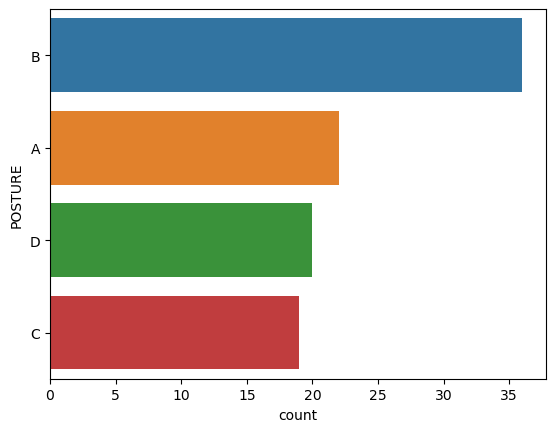

In [262]:
Posture_df = df['POSTURE'].value_counts().index
sns.countplot(y='POSTURE', order=Posture_df, data=df)



<Axes: xlabel='count', ylabel='MBTI'>

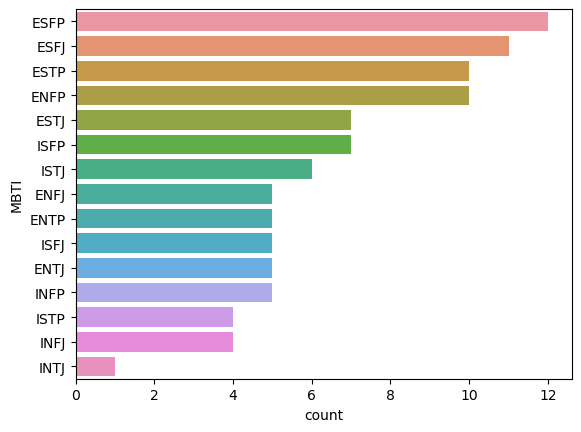

In [147]:
MBTI_df = df['MBTI'].value_counts().index
sns.countplot(y='MBTI', order=MBTI_df, data=df)

In [142]:
Extroverts = df[df['E'] > df['I']]
Introverts = df[df['I'] >= df['E']]
Sensing = df[df['S'] > df['N']]
Inituition = df[df['N'] >= df['S']]
Thinking = df[df['T'] > df['F']]
Feeling = df[df['F'] >= df['T']]


## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? There was no information regarding how Activity Levels were measured, I was surprised to see the majority as 'Low'. 
2. Do you have any concerns about your dataset? No
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? Make sure the 'MBTI' are assigned correctly.